In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

**Load example data 1**


run one of the example data cells

In [2]:
data = pd.read_csv('example_data\dummy_data_processed.csv')

# split data into X features and y labels
X = np.array(data.drop(labels='Sales', axis=1))
y = np.array(data['Sales'])

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

**Load example data 2**

In [ ]:
data = pd.read_csv('example_data_2\house_properties_data_processed.csv')

# split data into X features and y labels
X = np.array(data.drop(labels='Sales', axis=1))
y = np.array(data['Sales'])

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

In [3]:
# TODO: Implement ridge regression, NN regression, gradient tree boosting and gaussian regression

estimators = []

## **Ridge regression**

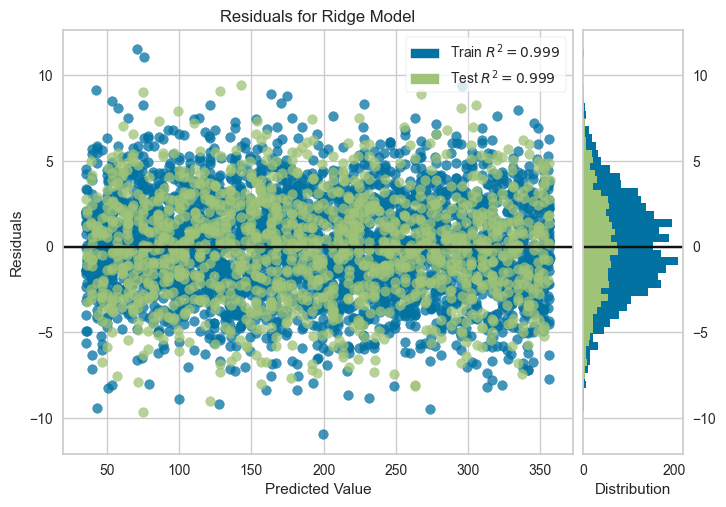

In [4]:
from sklearn import linear_model

# create ridge regression model
reg = linear_model.Ridge(alpha=.5)

# fit model
reg.fit(data_train, target_train)
reg.score(data_test, target_test)

# visualize the model performance using yellowbrick
visualizer = ResidualsPlot(reg)
visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
plt.title
visualizer.show()

estimators.append(('ridge', reg))   

## **Random Forest Regressor**

In [5]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100,150,200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5,n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(data_train, target_train)

# Print the best hyperparameters and their corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

RFR.set_params(**grid_search.best_params_)
RFR.fit(data_train, target_train)
RFR.score(data_test, target_test.flatten())

estimators.append(('Random forest', RFR))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best score: 0.9988695108124108


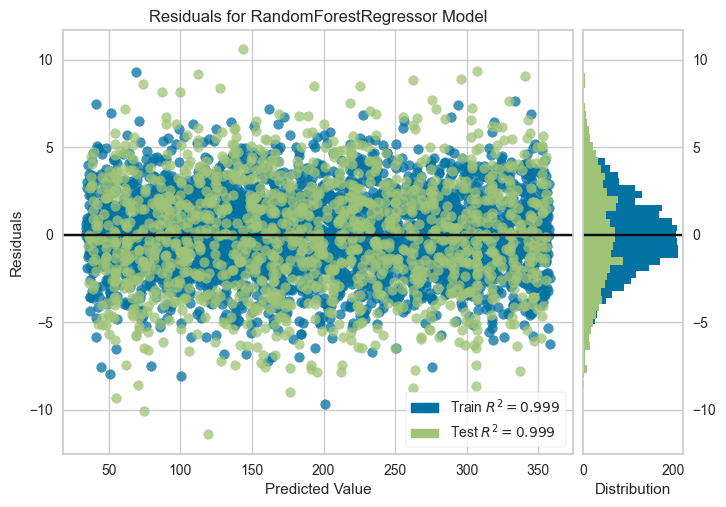

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [6]:
# visualize the model performance using yellowbrick
visualizer = ResidualsPlot(RFR)
visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
plt.title
visualizer.show()   

## **Multi-layer Perceptron**

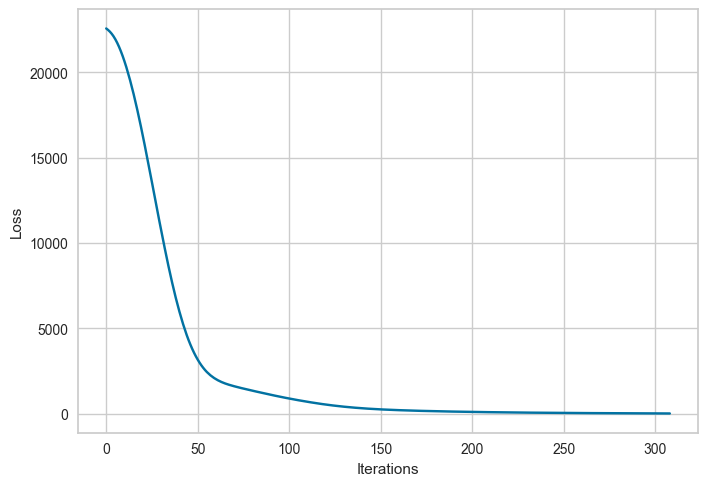

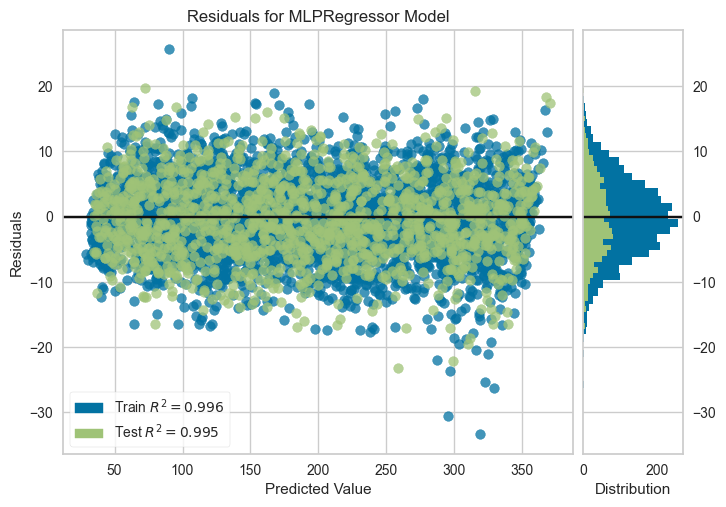

<AxesSubplot: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(learning_rate='constant', early_stopping=True, max_iter=1000)

MLP.fit(data_train, target_train)

# TODO: Implement grid search for MLP

MLP.score(data_test, target_test)

sns.lineplot(MLP.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# visualize the model performance using yellowbrick
visualizer = ResidualsPlot(MLP)
visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
plt.title
visualizer.show()   

## **Stack regressor**

[('ridge', Ridge(alpha=0.5)), ('Random forest', RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150))]


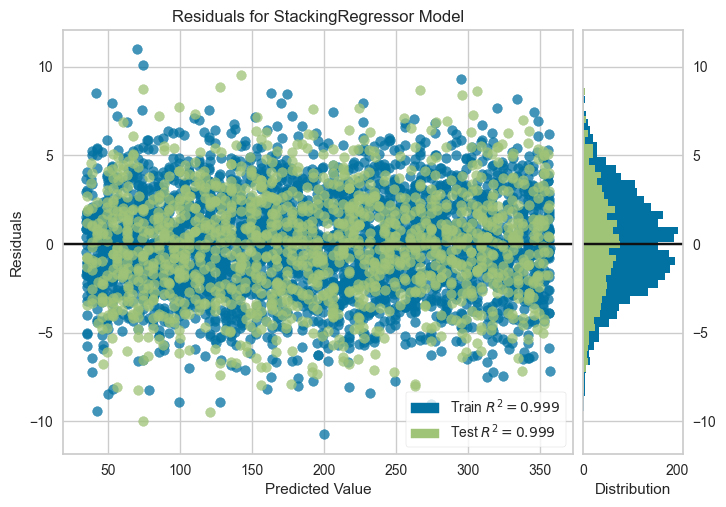

<AxesSubplot: title={'center': 'Residuals for StackingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [8]:
from sklearn.ensemble import StackingRegressor

print(estimators)

# Create the stacking regressor thats uses the previous models and weights them using ridge regression, default is 5-fold cross validation.
stack_regressor = StackingRegressor(estimators=estimators,n_jobs=-1)

stack_regressor.fit(data_train, target_train)

visualizer = ResidualsPlot(stack_regressor)
visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
plt.title
visualizer.show()   